In [11]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [12]:
# Get data from provider
symbol = yf.Ticker('BTC-USD')
start_date = datetime.datetime.fromtimestamp(1410912000)
end_date = datetime.datetime.now()
df = symbol.history(start=start_date, end=end_date)
df = df[['Open', 'High', 'Low', 'Close']]
df.index.name = 'datetime'
df = df.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close'})
df = df.resample('1M').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
})
df['RSI'] = ta.rsi(df['close'], length=14)
df.dropna(inplace=True)
df.head()

/tmp/ipykernel_71862/2119096050.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('1M').agg({


,open,high,low,close,RSI
datetime,,,,,
2015-11-30 00:00:00+00:00,315.005005,495.562012,300.997009,377.321014,58.721475
2015-12-31 00:00:00+00:00,377.414001,469.102997,349.464996,430.566986,64.315053
2016-01-31 00:00:00+00:00,430.721008,462.933990,354.914001,368.766998,54.999465
2016-02-29 00:00:00+00:00,369.350006,448.045990,367.957001,437.696991,61.668434
2016-03-31 00:00:00+00:00,437.916992,439.653015,394.035004,416.729004,58.813154


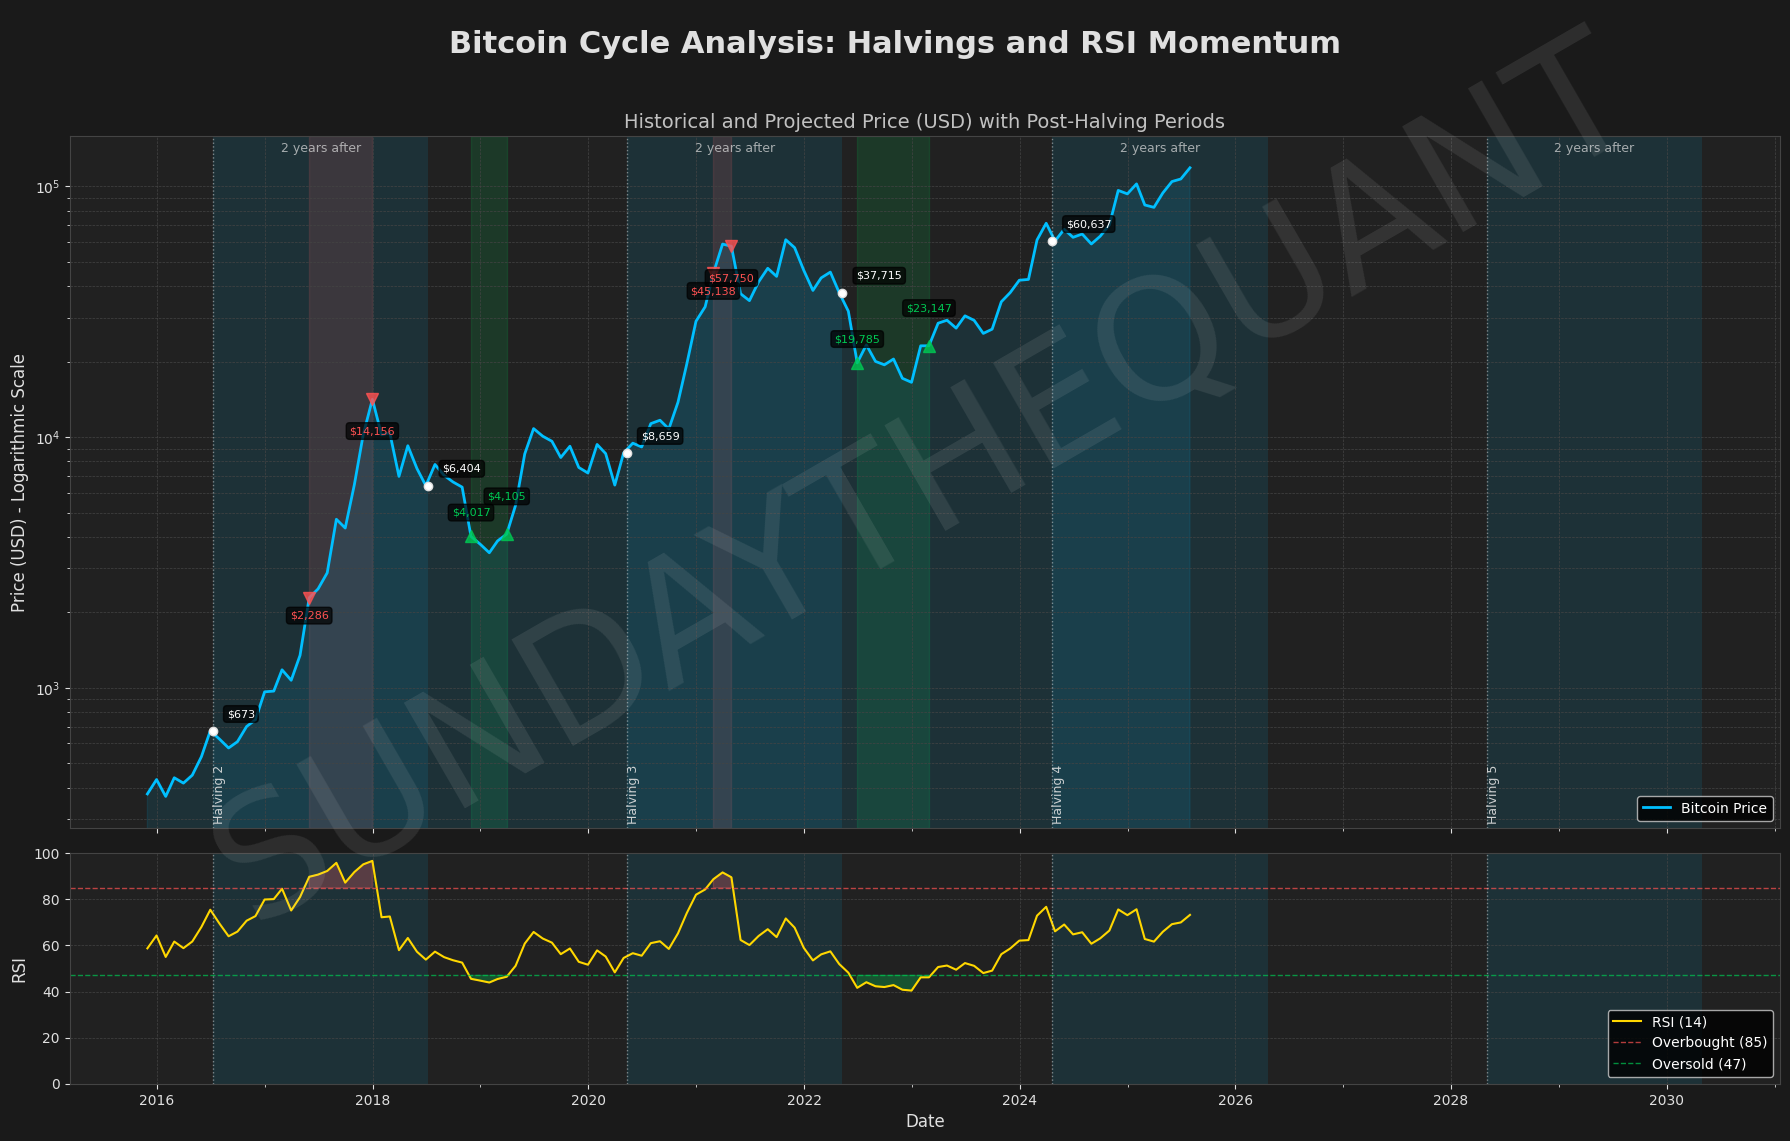

In [35]:
# --- 2. Configuración de Estilo Profesional (Tema Oscuro) ---
BG_COLOR = '#1a1a1a'  # Fondo principal (gris oscuro)
AXES_COLOR = '#212121'  # Fondo de los gráficos (ligeramente más claro)
TEXT_COLOR = '#E0E0E0'  # Color del texto (blanco roto)
GRID_COLOR = '#444444'  # Color de la cuadrícula
PRIMARY_COLOR = '#00BFFF'  # Azul eléctrico para el precio
SECONDARY_COLOR = '#FFD700'  # Dorado para el RSI
RED_COLOR = '#FF5252'  # Rojo para sobrecompra
GREEN_COLOR = '#00C853'  # Verde para sobreventa

OVERBOUGHT_THRESHOLD = 85
OVERSOLD_THRESHOLD = 47

# Aplicar colores de texto y ejes globalmente
plt.rcParams.update({
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'axes.edgecolor': GRID_COLOR
})

# --- 3. Creación del Gráfico ---
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(18, 12),
    sharex=True,
    facecolor=BG_COLOR,  # Aplicar color de fondo a toda la figura
    gridspec_kw={'height_ratios': [3, 1]}  # Dar más espacio al precio
)

# Ajustar el color de fondo de cada subplot
ax1.set_facecolor(AXES_COLOR)
ax2.set_facecolor(AXES_COLOR)

# --- Títulos ---
fig.suptitle(
    'Bitcoin Cycle Analysis: Halvings and RSI Momentum',
    fontsize=22,
    fontweight='bold',
    y=0.96  # Ajustar posición vertical
)
ax1.set_title(
    'Historical and Projected Price (USD) with Post-Halving Periods',
    fontsize=14,
    color=TEXT_COLOR,
    alpha=0.85
)

# --- Subplot 1: Precio de Bitcoin ---
ax1.plot(df.index, df['close'], color=PRIMARY_COLOR, linewidth=2, label='Bitcoin Price')
ax1.set_ylabel('Price (USD) - Logarithmic Scale', fontsize=12)
ax1.set_yscale('log')  # La escala logarítmica es mejor para visualizar precios exponenciales
ax1.grid(True, which="both", linestyle='--', linewidth=0.5, color=GRID_COLOR)

# Proyectar zonas de RSI en el gráfico de precio
overbought_mask = df['RSI'] >= OVERBOUGHT_THRESHOLD
oversold_mask = df['RSI'] <= OVERSOLD_THRESHOLD

# Añadir áreas de sobrecompra y sobreventa proyectadas en el precio
# Use axvspan instead of fill_between to cover entire vertical space
for i, (idx, is_overbought) in enumerate(overbought_mask.items()):
    if is_overbought:
        if i == 0 or not overbought_mask.iloc[i-1]:  # Start of overbought period
            start_date = idx
        if i == len(overbought_mask)-1 or not overbought_mask.iloc[i+1]:  # End of overbought period
            end_date = idx
            ax1.axvspan(start_date, end_date, color=RED_COLOR, alpha=0.15, label=f'Overbought Zone (RSI ≥{OVERBOUGHT_THRESHOLD})' if i == 0 else "")

for i, (idx, is_oversold) in enumerate(oversold_mask.items()):
    if is_oversold:
        if i == 0 or not oversold_mask.iloc[i-1]:  # Start of oversold period
            start_date = idx
        if i == len(oversold_mask)-1 or not oversold_mask.iloc[i+1]:  # End of oversold period
            end_date = idx
            ax1.axvspan(start_date, end_date, color=GREEN_COLOR, alpha=0.15, label=f'Oversold Zone (RSI ≤{OVERSOLD_THRESHOLD})' if i == 0 else "")

legend1 = ax1.legend(loc='lower right')
legend1.get_frame().set_facecolor('black')
legend1.get_frame().set_alpha(0.8)
for text in legend1.get_texts():
    text.set_color('white')

# Añadir gradiente debajo de la línea de precio
line = ax1.get_lines()[0]
x_data, y_data = line.get_data()
ax1.fill_between(x_data, y_data, color=PRIMARY_COLOR, alpha=0.1)

# --- Subplot 2: RSI ---
ax2.plot(df.index, df['RSI'], color=SECONDARY_COLOR, linewidth=1.5, label='RSI (14)')
ax2.axhline(OVERBOUGHT_THRESHOLD, color=RED_COLOR, linestyle='--', linewidth=1, alpha=0.7,
            label=f'Overbought ({OVERBOUGHT_THRESHOLD})')
ax2.axhline(OVERSOLD_THRESHOLD, color=GREEN_COLOR, linestyle='--', linewidth=1, alpha=0.7,
            label=f'Oversold ({OVERSOLD_THRESHOLD})')

# Rellenar áreas de sobrecompra y sobreventa
ax2.fill_between(df.index, OVERBOUGHT_THRESHOLD, df['RSI'], where=df['RSI'] >= OVERBOUGHT_THRESHOLD, color=RED_COLOR,
                 alpha=0.3)
ax2.fill_between(df.index, OVERSOLD_THRESHOLD, df['RSI'], where=df['RSI'] <= OVERSOLD_THRESHOLD, color=GREEN_COLOR,
                 alpha=0.3)

ax2.set_ylabel('RSI', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylim(0, 100)
ax2.grid(True, linestyle='--', linewidth=0.5, color=GRID_COLOR)
legend2 = ax2.legend(loc='lower right')
legend2.get_frame().set_facecolor('black')
legend2.get_frame().set_alpha(0.8)
for text in legend2.get_texts():
    text.set_color('white')

# --- 4. Visualización de Ciclos con Áreas Sombreadas ---
halving_dates = [
    ('2016-07-09', '2018-07-09'),
    ('2020-05-11', '2022-05-11'),
    ('2024-04-20', '2026-04-20'),
    ('2028-05-01', '2030-05-01')  # Futuro
]

for i, (start_date, end_date) in enumerate(halving_dates):
    # Convert to timezone-aware timestamps to match df.index
    start = pd.to_datetime(start_date, utc=True)
    end = pd.to_datetime(end_date, utc=True)

    # Dibujar área sombreada en ambos gráficos
    ax1.axvspan(start, end, color=PRIMARY_COLOR, alpha=0.10, ec=None)
    ax2.axvspan(start, end, color=PRIMARY_COLOR, alpha=0.10, ec=None)

    # Anotación del Halving
    ax1.axvline(start, color=TEXT_COLOR, linestyle=':', linewidth=1, alpha=0.5)
    ax2.axvline(start, color=TEXT_COLOR, linestyle=':', linewidth=1, alpha=0.5)
    ax1.text(start, ax1.get_ylim()[0], f' Halving {i + 2}', rotation=90,
             verticalalignment='bottom', fontsize=9, color=TEXT_COLOR, alpha=0.9)
    
    # Añadir precio en fechas de halving
    if start <= df.index.max():
        closest_halving_idx = df.index.get_indexer([start], method='nearest')[0]
        halving_price = df.iloc[closest_halving_idx]['close']
        ax1.plot(start, halving_price, 'o', color='white', markersize=6, markeredgecolor=TEXT_COLOR)
        ax1.annotate(f'${halving_price:,.0f}', xy=(start, halving_price),
                     xytext=(10, 10), textcoords='offset points',
                     fontsize=8, color='white', 
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))
    
    # Añadir precio 2 años después
    if end <= df.index.max():
        closest_end_idx = df.index.get_indexer([end], method='nearest')[0]
        end_price = df.iloc[closest_end_idx]['close']
        ax1.plot(end, end_price, 'o', color='white', markersize=6, markeredgecolor=TEXT_COLOR)
        ax1.annotate(f'${end_price:,.0f}', xy=(end, end_price),
                     xytext=(10, 10), textcoords='offset points',
                     fontsize=8, color='white',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))
    
    # Añadir texto horizontal "2 years after" en el centro del área sombreada
    middle_date = start + (end - start) / 2
    ax1.text(middle_date, ax1.get_ylim()[1] * 0.95, '2 years after', 
             horizontalalignment='center', verticalalignment='top',
             fontsize=9, color=TEXT_COLOR, alpha=0.7)

# Function to find continuous periods and get first/last points
def get_period_endpoints(mask, data, threshold_check):
    """Get first and last points of continuous periods where mask is True"""
    points = []
    in_period = False
    period_start = None
    
    for i, (idx, is_condition) in enumerate(mask.items()):
        if is_condition and not in_period:
            # Start of new period
            in_period = True
            period_start = idx
        elif not is_condition and in_period:
            # End of period
            in_period = False
            period_end = data.index[i-1]  # Previous index
            if period_start is not None:
                points.append(('start', period_start, data.loc[period_start]))
                points.append(('end', period_end, data.loc[period_end]))
    
    # Handle case where period extends to end of data
    if in_period and period_start is not None:
        period_end = data.index[-1]
        points.append(('start', period_start, data.loc[period_start]))
        points.append(('end', period_end, data.loc[period_end]))
    
    return points

# Get overbought and oversold period endpoints
overbought_points = get_period_endpoints(overbought_mask, df, OVERBOUGHT_THRESHOLD)
oversold_points = get_period_endpoints(oversold_mask, df, OVERSOLD_THRESHOLD)

# Plot overbought points (sell signals)
for point_type, idx, row in overbought_points:
    if point_type == 'start':
        marker = 'v'
        offset = -15
    else:  # end
        marker = 'v'
        offset = -25
    
    ax1.plot(idx, row['close'], marker, color=RED_COLOR, markersize=8, alpha=0.8)
    ax1.annotate(f'${row["close"]:,.0f}', xy=(idx, row['close']),
                 xytext=(0, offset), textcoords='offset points',
                 fontsize=8, color=RED_COLOR, ha='center',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

# Plot oversold points (buy signals)
for point_type, idx, row in oversold_points:
    if point_type == 'start':
        marker = '^'
        offset = 15
    else:  # end
        marker = '^'
        offset = 25
    
    ax1.plot(idx, row['close'], marker, color=GREEN_COLOR, markersize=8, alpha=0.8)
    ax1.annotate(f'${row["close"]:,.0f}', xy=(idx, row['close']),
                 xytext=(0, offset), textcoords='offset points',
                 fontsize=8, color=GREEN_COLOR, ha='center',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

# --- 5. Ajustes Finales ---
# Formatear el eje X para mostrar las fechas de forma más limpia
ax2.xaxis.set_major_locator(mdates.YearLocator(2))  # Marcas mayores cada 2 años
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_minor_locator(mdates.YearLocator())  # Marcas menores cada año

# Add watermark
fig.text(0.5, 0.5, 'SUNDAYTHEQUANT', fontsize=120, color=TEXT_COLOR, alpha=0.1,
         ha='center', va='center', rotation=30, transform=ax1.transAxes)

plt.tight_layout(rect=[0, 0.03, 1, 0.94])  # Ajustar para dar espacio a los títulos
plt.show()